In [1]:
# 1. Beskriv kort hur en relationsdatabas fungerar.
# A relational database is a program that is used to connect and organize data so that it is easily able to be analyzed.
# This is done by placing data into tables, which can then be connected together using primary and foreign keys. These keys
# can help to sort the data within separate tables by identifying matching records accross these tables according to the matching
# keys. This data is organized into rows and columns; rows tend to refer to information that is all relating to one primary unit, 
# and columns refer to the categories that the information is referring to. 

# 2. Vad menas med “CRUD”-flödet?
# CRUD refers to the operations that are necessary to be able to successfully manage a database. 
# C - Create: Refers to the ability to create new information and place it into a table (and therefore into the wider database). 
# R - Read: Refers to the ability to pull information out of the database and 'read' or analyse the data.
# U - Update: Refers to the ability to edit information within the database and then commit those changes successfully. 
# D - Delete: Refers to the ability to remove information from the database where necessary. 

# 3. Beskriv kort vad en “left join” och en “inner join” är. Varför använder man det?
# A LEFT JOIN is an SQL command that can be used to query the database by pulling information from two separate tables
# together into a readable format. The LEFT JOIN will take the table that is written on the left hand side of the
# LEFT JOIN command and attempt to match every corresponding row from the table that is written on the right hand side of the
# LEFT JOIN command based on their primary/foreign key matches. If there are no matching records then it can enter a
# NULL value from the right table. This allows for a match on every single row in the left hand table, even when
# there is not any corresponding information in the right hand table. 
# An INNER JOIN will attempt to do the same thing, but instead of filling rows without matches with NULL it will instead
# only match those with data recorded in both corresponding rows and simply not provide the cases where there is no information
# on either side of the JOIN command.

# 4. Beskriv kort vad indexering i SQL innebär.
# Indexing is a method that can be used to improve how efficiently data can be retrieved within a database. This is done by 
# creating an index which the database can reference when tasked with retrieving or querying information, acting as a 
# kind of shortcut. The system can then utilize the index that has been created whenever information that the index relates to
# is queried. The system uses existing indexes automatically when it would be more efficient to do so. 

# 5. Beskriv kort vad en vy i SQL är.
# A view in SQL is a read-only snapshot of the output of a query in a table format. This can be useful when access to data is 
# important but the ability to modify this data is not. It is also valuable because it limits what information is visible within
# the table, showing only the information that has been specifically requested. 

# 6. Beskriv kort vad en lagrad procedur i SQL är.
# A stored procedure can be understood similarly to a 'function' in python; lines of code that are stored as a prepared operation
# that can be written in wherever a specific task or function is required. Stored procedures are very versatile as their operations
# can vary greatly. They can be used to format tables according to certain criteria, or to query certain tables within the database
# or to undertake complex calculations. They are valuable because it can save time being able to rely on stored procedures when applying
# the same logic to different processes.

In [2]:
# Beginning of programming part of assignment - installing and preparing sqlalchemy/pyodbc/pandas/matplotlib.
!pip install sqlalchemy
!pip install pyodbc
!pip install matplotlib

In [3]:
from sqlalchemy import create_engine, Table, inspect
import pandas as pd
from sqlalchemy import text

In [5]:
def new_engine(dialect, server, database, user=None, password=None, integrated_security=True):
    if integrated_security:
        # For Windows authentication
        eng = f"{dialect}://{server}/{database}?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server"
    else:
        # For SQL Server authentication
        eng = f"{dialect}://{user}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
    print(eng)
    return create_engine(eng)

In [6]:
# Log-in 
engine = new_engine('mssql', 'DESKTOP-85G42C8', 'AdventureWorks2022', integrated_security=True)

mssql://DESKTOP-85G42C8/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server


In [7]:
# Check
print(type(engine))

<class 'sqlalchemy.engine.base.Engine'>


In [8]:
inspector = inspect(engine)
schemas = inspector.get_schema_names()
print(schemas)

['db_accessadmin', 'db_backupoperator', 'db_datareader', 'db_datawriter', 'db_ddladmin', 'db_denydatareader', 'db_denydatawriter', 'db_owner', 'db_securityadmin', 'dbo', 'guest', 'HumanResources', 'INFORMATION_SCHEMA', 'Person', 'Production', 'Purchasing', 'Sales', 'sys']


In [9]:
for schema in schemas:
    print(schema)

db_accessadmin
db_backupoperator
db_datareader
db_datawriter
db_ddladmin
db_denydatareader
db_denydatawriter
db_owner
db_securityadmin
dbo
guest
HumanResources
INFORMATION_SCHEMA
Person
Production
Purchasing
Sales
sys


In [10]:
#These are all the schemas that are contained within the database. The schemas that contain information
#of value are Sales, Purchasing, Production, Person, HumanResources - but to confirm we can explore these db_% schemas
#to confirm.

In [11]:
schema_name = "db_accessadmin"  
tables_query = text(f"""
    SELECT table_name
    FROM information_schema.tables
    WHERE table_schema = '{schema_name}';
""")
with engine.connect() as connection:
    tables = connection.execute(tables_query).fetchall()

# Convert to a list for display
tables_list = [row[0] for row in tables]
print(f"Tables in the {schema_name} schema:", tables_list)

Tables in the db_accessadmin schema: []


In [12]:
#quick search shows no tables in this schema. It seems to be a database operations schema. 

In [13]:
#so let's now check some more important schemas. 

In [14]:
schema_name = "Sales"  
tables_query = text(f"""
    SELECT table_name
    FROM information_schema.tables
    WHERE table_schema = '{schema_name}';
""")
with engine.connect() as connection:
    tables = connection.execute(tables_query).fetchall()

# Convert to a list for display
tables_list = [row[0] for row in tables]
print(f"Tables in the {schema_name} schema:", tables_list)

Tables in the Sales schema: ['SalesTaxRate', 'PersonCreditCard', 'SalesTerritory', 'vIndividualCustomer', 'vPersonDemographics', 'vSalesPerson', 'SalesTerritoryHistory', 'vSalesPersonSalesByFiscalYears', 'vStoreWithDemographics', 'vStoreWithContacts', 'vStoreWithAddresses', 'ShoppingCartItem', 'SpecialOffer', 'SpecialOfferProduct', 'Store', 'CountryRegionCurrency', 'CreditCard', 'Currency', 'CurrencyRate', 'Customer', 'SalesOrderDetail', 'MontyPython', 'SalesOrderHeader', 'SalesOrderHeaderSalesReason', 'SalesPerson', 'SalesPersonQuotaHistory', 'SalesReason']


In [15]:
print(f"Tables in the {schema_name} schema:")
for table in tables_list:
    print(table)

Tables in the Sales schema:
SalesTaxRate
PersonCreditCard
SalesTerritory
vIndividualCustomer
vPersonDemographics
vSalesPerson
SalesTerritoryHistory
vSalesPersonSalesByFiscalYears
vStoreWithDemographics
vStoreWithContacts
vStoreWithAddresses
ShoppingCartItem
SpecialOffer
SpecialOfferProduct
Store
CountryRegionCurrency
CreditCard
Currency
CurrencyRate
Customer
SalesOrderDetail
MontyPython
SalesOrderHeader
SalesOrderHeaderSalesReason
SalesPerson
SalesPersonQuotaHistory
SalesReason


In [16]:
# Sales schema tables are as above - this schema relates to any information that is related to the sale of a product.
# The actual sale itself is covered (such as SalesOrderDetail), but also demographic information on the customer is 
# included (PersonDemographics), the employee that processed the sale (SalesPerson), and where (Store). 

# We can look into these tables to examine the data and confirm this information. 

In [17]:
# Showing the SalesPerson table output. 
table_name = "SalesPerson"

table_query = text(f"SELECT TOP 10 * FROM {schema_name}.{table_name};")

with engine.connect() as connection:
    results = connection.execute(table_query).fetchall()

print(f"Contents of the table '{table_name}':")
for row in results:
    print(row)

Contents of the table 'SalesPerson':
(274, None, None, Decimal('0.0000'), Decimal('0.0000'), Decimal('559697.5639'), Decimal('0.0000'), '48754992-9EE0-4C0E-8C94-9451604E3E02', datetime.datetime(2010, 12, 28, 0, 0))
(275, 2, Decimal('300000.0000'), Decimal('4100.0000'), Decimal('0.0120'), Decimal('3763178.1787'), Decimal('1750406.4785'), '1E0A7274-3064-4F58-88EE-4C6586C87169', datetime.datetime(2011, 5, 24, 0, 0))
(276, 4, Decimal('250000.0000'), Decimal('2000.0000'), Decimal('0.0150'), Decimal('4251368.5497'), Decimal('1439156.0291'), '4DD9EEE4-8E81-4F8C-AF97-683394C1F7C0', datetime.datetime(2011, 5, 24, 0, 0))
(277, 3, Decimal('250000.0000'), Decimal('2500.0000'), Decimal('0.0150'), Decimal('3189418.3662'), Decimal('1997186.2037'), '39012928-BFEC-4242-874D-423162C3F567', datetime.datetime(2011, 5, 24, 0, 0))
(278, 6, Decimal('250000.0000'), Decimal('500.0000'), Decimal('0.0100'), Decimal('1453719.4653'), Decimal('1620276.8966'), '7A0AE1AB-B283-40F9-91D1-167ABF06D720', datetime.datetim

In [18]:
# Above is not particularly readable, so needs to be cleaned up. First sorting out column names for output.
column_query = text(f"""
    SELECT COLUMN_NAME 
    FROM INFORMATION_SCHEMA.COLUMNS 
    WHERE TABLE_SCHEMA = '{schema_name}' AND TABLE_NAME = '{table_name}';
""")

with engine.connect() as connection:
    columns = connection.execute(column_query).fetchall()

column_names = [col[0] for col in columns]

print("Column Names:", column_names)

Column Names: ['BusinessEntityID', 'TerritoryID', 'SalesQuota', 'Bonus', 'CommissionPct', 'SalesYTD', 'SalesLastYear', 'rowguid', 'ModifiedDate']


In [19]:
# Then using these column names to print out a cleaner output. It's easy enough to read now.
table_query = text(f"SELECT * FROM {schema_name}.{table_name};")

with engine.connect() as connection:
    results = connection.execute(table_query).fetchall()

df = pd.DataFrame(results, columns=column_names)
df

# Shows BusinessEntityID, which is the uid (unique ID) for every sales person. Territory ID will refer to their location. 
# How does one actually look at what a column name means though? 

,BusinessEntityID,TerritoryID,SalesQuota,Bonus,CommissionPct,SalesYTD,SalesLastYear,rowguid,ModifiedDate
0,274,NaN,None,0.0000,0.0000,559697.5639,0.0000,48754992-9EE0-4C0E-8C94-9451604E3E02,2010-12-28
1,275,2.0,300000.0000,4100.0000,0.0120,3763178.1787,1750406.4785,1E0A7274-3064-4F58-88EE-4C6586C87169,2011-05-24
2,276,4.0,250000.0000,2000.0000,0.0150,4251368.5497,1439156.0291,4DD9EEE4-8E81-4F8C-AF97-683394C1F7C0,2011-05-24
3,277,3.0,250000.0000,2500.0000,0.0150,3189418.3662,1997186.2037,39012928-BFEC-4242-874D-423162C3F567,2011-05-24
4,278,6.0,250000.0000,500.0000,0.0100,1453719.4653,1620276.8966,7A0AE1AB-B283-40F9-91D1-167ABF06D720,2011-05-24
5,279,5.0,300000.0000,6700.0000,0.0100,2315185.6110,1849640.9418,52A5179D-3239-4157-AE29-17E868296DC0,2011-05-24
6,280,1.0,250000.0000,5000.0000,0.0100,1352577.1325,1927059.1780,BE941A4A-FB50-4947-BDA4-BB8972365B08,2011-05-24
7,281,4.0,250000.0000,3550.0000,0.0100,2458535.6169,2073505.9999,35326DDB-7278-4FEF-B3BA-EA137B69094E,2011-05-24
8,282,6.0,250000.0000,5000.0000,0.0150,2604540.7172,2038234.6549,31FD7FC1-DC84-4F05-B9A0-762519EACACC,2011-05-24
9,283,1.0,250000.0000,3500.0000,0.0120,1573012.9383,1371635.3158,6BAC15B2-8FFB-45A9-B6D5-040E16C2073F,2011-05-24


In [20]:
# Query to check for the description of the variable 'SalesQuota' - Projected yearly sales. 
query = text("""
SELECT 
    CAST(ep.value AS NVARCHAR(MAX)) AS ColumnDescription
FROM 
    sys.extended_properties ep
    INNER JOIN sys.columns c ON ep.major_id = c.object_id AND ep.minor_id = c.column_id
    INNER JOIN sys.tables t ON c.object_id = t.object_id
WHERE 
    t.name = 'SalesPerson' 
    AND c.name = 'SalesQuota';
""")

with engine.connect() as connection:
    result = connection.execute(query).fetchall()

if result:
    print("Description of 'SalesQuota':", result[0][0])
else:
    print("No description found for 'SalesQuota'.")

Description of 'SalesQuota': Projected yearly sales.


In [21]:
# Doesn't provide much more information other than it is the projected yearly sales of an employee. This was just a 
# test to explore the data and set up some code that can be used to query tables and the variables that exist within them.
# These can now be used later on when building a statistical analysis of my choosing. 

In [22]:
schema_name = "Production" 
tables_query = text(f"""
    SELECT table_name
    FROM information_schema.tables
    WHERE table_schema = '{schema_name}';
""")
with engine.connect() as connection:
    tables = connection.execute(tables_query).fetchall()

tables_list = [row[0] for row in tables]
print(f"Tables in the {schema_name} schema:", tables_list)

Tables in the Production schema: ['Product', 'vProductAndDescription', 'vProductModelCatalogDescription', 'vProductModelInstructions', 'ScrapReason', 'ProductCategory', 'ProductCostHistory', 'ProductDescription', 'ProductDocument', 'ProductInventory', 'ProductListPriceHistory', 'ProductModel', 'ProductModelIllustration', 'ProductModelProductDescriptionCulture', 'BillOfMaterials', 'ProductPhoto', 'ProductProductPhoto', 'TransactionHistory', 'ProductReview', 'TransactionHistoryArchive', 'ProductSubcategory', 'UnitMeasure', 'WorkOrder', 'Culture', 'WorkOrderRouting', 'Document', 'Illustration', 'Location']


In [23]:
print(f"Tables in the {schema_name} schema:")
for table in tables_list:
    print(table)

Tables in the Production schema:
Product
vProductAndDescription
vProductModelCatalogDescription
vProductModelInstructions
ScrapReason
ProductCategory
ProductCostHistory
ProductDescription
ProductDocument
ProductInventory
ProductListPriceHistory
ProductModel
ProductModelIllustration
ProductModelProductDescriptionCulture
BillOfMaterials
ProductPhoto
ProductProductPhoto
TransactionHistory
ProductReview
TransactionHistoryArchive
ProductSubcategory
UnitMeasure
WorkOrder
Culture
WorkOrderRouting
Document
Illustration
Location


In [24]:
# Using this command we can see that the Production schema refers largely to the product that the company is selling, as well as
# things such as transaction and order history, and possibly some technical information on said products. I will create another table
# to show quickly the product table just to confirm that this data refers to a product and to get a better idea of the product that is being
# sold in this AdventureWorks dataset/company. 

In [25]:
table_name = "Product"

table_query = text(f"SELECT TOP 10 * FROM {schema_name}.{table_name};")

with engine.connect() as connection:
    results = connection.execute(table_query).fetchall()

print(f"Contents of the table '{table_name}':")
for row in results:
    print(row)

Contents of the table 'Product':
(1, 'Adjustable Race', 'AR-5381', False, False, None, 1000, 750, Decimal('0.0000'), Decimal('0.0000'), None, None, None, None, 0, None, None, None, None, None, datetime.datetime(2008, 4, 30, 0, 0), None, None, '694215B7-08F7-4C0D-ACB1-D734BA44C0C8', datetime.datetime(2014, 2, 8, 10, 1, 36, 827000))
(2, 'Bearing Ball', 'BA-8327', False, False, None, 1000, 750, Decimal('0.0000'), Decimal('0.0000'), None, None, None, None, 0, None, None, None, None, None, datetime.datetime(2008, 4, 30, 0, 0), None, None, '58AE3C20-4F3A-4749-A7D4-D568806CC537', datetime.datetime(2014, 2, 8, 10, 1, 36, 827000))
(3, 'BB Ball Bearing', 'BE-2349', True, False, None, 800, 600, Decimal('0.0000'), Decimal('0.0000'), None, None, None, None, 1, None, None, None, None, None, datetime.datetime(2008, 4, 30, 0, 0), None, None, '9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E', datetime.datetime(2014, 2, 8, 10, 1, 36, 827000))
(4, 'Headset Ball Bearings', 'BE-2908', False, False, None, 800, 600, De

In [26]:
column_query = text(f"""
    SELECT COLUMN_NAME 
    FROM INFORMATION_SCHEMA.COLUMNS 
    WHERE TABLE_SCHEMA = '{schema_name}' AND TABLE_NAME = '{table_name}';
""")

with engine.connect() as connection:
    columns = connection.execute(column_query).fetchall()

column_names = [col[0] for col in columns]

print("Column Names:", column_names)

Column Names: ['ProductID', 'Name', 'ProductNumber', 'MakeFlag', 'FinishedGoodsFlag', 'Color', 'SafetyStockLevel', 'ReorderPoint', 'StandardCost', 'ListPrice', 'Size', 'SizeUnitMeasureCode', 'WeightUnitMeasureCode', 'Weight', 'DaysToManufacture', 'ProductLine', 'Class', 'Style', 'ProductSubcategoryID', 'ProductModelID', 'SellStartDate', 'SellEndDate', 'DiscontinuedDate', 'rowguid', 'ModifiedDate']


In [27]:
table_query = text(f"SELECT * FROM {schema_name}.{table_name};")

with engine.connect() as connection:
    results = connection.execute(table_query).fetchall()

df = pd.DataFrame(results, columns=column_names)
df

,ProductID,Name,ProductNumber,MakeFlag,FinishedGoodsFlag,Color,SafetyStockLevel,ReorderPoint,StandardCost,ListPrice,...,ProductLine,Class,Style,ProductSubcategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,rowguid,ModifiedDate
0,1,Adjustable Race,AR-5381,False,False,None,1000,750,0.0000,0.0000,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,694215B7-08F7-4C0D-ACB1-D734BA44C0C8,2014-02-08 10:01:36.827
1,2,Bearing Ball,BA-8327,False,False,None,1000,750,0.0000,0.0000,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,58AE3C20-4F3A-4749-A7D4-D568806CC537,2014-02-08 10:01:36.827
2,3,BB Ball Bearing,BE-2349,True,False,None,800,600,0.0000,0.0000,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,9C21AED2-5BFA-4F18-BCB8-F11638DC2E4E,2014-02-08 10:01:36.827
3,4,Headset Ball Bearings,BE-2908,False,False,None,800,600,0.0000,0.0000,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,ECFED6CB-51FF-49B5-B06C-7D8AC834DB8B,2014-02-08 10:01:36.827
4,316,Blade,BL-2036,True,False,None,800,600,0.0000,0.0000,...,None,None,None,NaN,NaN,2008-04-30,NaT,None,E73E9750-603B-4131-89F5-3DD15ED5FF80,2014-02-08 10:01:36.827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,995,ML Bottom Bracket,BB-8107,True,True,None,500,375,44.9506,101.2400,...,None,M,None,5.0,96.0,2013-05-30,NaT,None,71AB847F-D091-42D6-B735-7B0C2D82FC84,2014-02-08 10:01:36.827
500,996,HL Bottom Bracket,BB-9108,True,True,None,500,375,53.9416,121.4900,...,None,H,None,5.0,97.0,2013-05-30,NaT,None,230C47C5-08B2-4CE3-B706-69C0BDD62965,2014-02-08 10:01:36.827
501,997,"Road-750 Black, 44",BK-R19B-44,True,True,Black,100,75,343.6496,539.9900,...,R,L,U,2.0,31.0,2013-05-30,NaT,None,44CE4802-409F-43AB-9B27-CA53421805BE,2014-02-08 10:01:36.827
502,998,"Road-750 Black, 48",BK-R19B-48,True,True,Black,100,75,343.6496,539.9900,...,R,L,U,2.0,31.0,2013-05-30,NaT,None,3DE9A212-1D49-40B6-B10A-F564D981DBDE,2014-02-08 10:01:36.827


In [28]:
# From this information we can deduce that the dataset is focused on a company that sells bikes and bike components. 
# There is likely a lot of useful information that can be looked at in the 'Production' schema, but going through everything
# is likely not practical nor necessary for our general analysis of the data. From here, I will simply provide a schema overview
# of the remaining important schemas, and then move onto the analysis section of the assignment. 

In [29]:
schema_name = "Person" 
tables_query = text(f"""
    SELECT table_name
    FROM information_schema.tables
    WHERE table_schema = '{schema_name}';
""")
with engine.connect() as connection:
    tables = connection.execute(tables_query).fetchall()

tables_list = [row[0] for row in tables]
print(f"Tables in the {schema_name} schema:", tables_list)

Tables in the Person schema: ['vAdditionalContactInfo', 'PersonPhone', 'PhoneNumberType', 'vStateProvinceCountryRegion', 'Address', 'AddressType', 'StateProvince', 'BusinessEntity', 'BusinessEntityAddress', 'BusinessEntityContact', 'ContactType', 'CountryRegion', 'MyPersonPhoneTable', 'VMyPersonPhoneTable', 'EmailAddress', 'Password', 'Person']


In [30]:
print(f"Tables in the {schema_name} schema:")
for table in tables_list:
    print(table)

Tables in the Person schema:
vAdditionalContactInfo
PersonPhone
PhoneNumberType
vStateProvinceCountryRegion
Address
AddressType
StateProvince
BusinessEntity
BusinessEntityAddress
BusinessEntityContact
ContactType
CountryRegion
MyPersonPhoneTable
VMyPersonPhoneTable
EmailAddress
Password
Person


In [31]:
# Within the 'Person' schema we see that there is customer information stored, such as their phone number, address, email
# and business information. 

# We can now show that we have briefly described three of the schemas so far - Person, Production, and Sales. The remaining schemas are: 
# Purchasing, HumanResources.

In [32]:
schema_name = "Purchasing" 
tables_query = text(f"""
    SELECT table_name
    FROM information_schema.tables
    WHERE table_schema = '{schema_name}';
""")
with engine.connect() as connection:
    tables = connection.execute(tables_query).fetchall()

tables_list = [row[0] for row in tables]
print(f"Tables in the {schema_name} schema:", tables_list)

Tables in the Purchasing schema: ['vVendorWithContacts', 'vVendorWithAddresses', 'ShipMethod', 'ProductVendor', 'Vendor', 'PurchaseOrderDetail', 'PurchaseOrderHeader']


In [33]:
# Here we can see the tables included in the 'Purchasing' schema - I believe that this is data referring to 
# where the company purchases their products that they then sell on to their customers. Vendors refers to their suppliers,
# and there will also be significant information stored here about the orders that the company has made for products and shipping.

In [34]:
schema_name = "HumanResources" 
tables_query = text(f"""
    SELECT table_name
    FROM information_schema.tables
    WHERE table_schema = '{schema_name}';
""")
with engine.connect() as connection:
    tables = connection.execute(tables_query).fetchall()

tables_list = [row[0] for row in tables]
print(f"Tables in the {schema_name} schema:", tables_list)

Tables in the HumanResources schema: ['vEmployee', 'vEmployeeDepartment', 'vEmployeeDepartmentHistory', 'vJobCandidate', 'vJobCandidateEmployment', 'vJobCandidateEducation', 'Shift', 'Department', 'Employee', 'EmployeeDepartmentHistory', 'EmployeePayHistory', 'JobCandidate']


In [35]:
# The tables included here in the 'HumanResources' schema will all refer to the employees within the company and their 
# various data points. Things such as employment dates, names, education, their work hours, pay rate. 

# From here, I believe we have adequately described the important schemas included within the AdventureWorks2022 database. 

# I am now going to begin the data analysis part of my assignment - I have decided to look at the performance of employees within the company. 
# I have decided to do this by looking at the cost efficiency of employees based on their commission rates - effectively trying to unveil their
# cost-efficiency. Of course, this kind of analysis could be quite complex, and getting a true picture of the cost efficiency may be hard
# when considering things such as the sales persons branch location, but for the purpose of this exercise I believe it would be a good
# introductory analysis.

# First of all, in order to begin this analysis, we need to identify members of the sales team who have the same position and worked for the
# most recent year (for now I am writing year - but this analysis may change to a cost-efficiency per month analysis depending on data 
# availability). Now that we have briefly explored the different schemas, we should be able to identify the correct tables to find this information.

# Within the 'HumanResources' schema there is the 'Employee' table. We can start there.

In [36]:
print(f"Tables in the {schema_name} schema:")
for table in tables_list:
    print(table)

Tables in the HumanResources schema:
vEmployee
vEmployeeDepartment
vEmployeeDepartmentHistory
vJobCandidate
vJobCandidateEmployment
vJobCandidateEducation
Shift
Department
Employee
EmployeeDepartmentHistory
EmployeePayHistory
JobCandidate


In [37]:
#table_name = "Employee"

#table_query = text(f"SELECT TOP 10 * FROM {schema_name}.{table_name};")

#with engine.connect() as connection:
    #results = connection.execute(table_query).fetchall()

#print(f"Contents of the table '{table_name}':")
#for row in results:
    #print(row)

# Have hashed this command as I received an error that suggested an unsupported data type within this table. Going to explore now: 

In [38]:
columns_query = text("""
    SELECT COLUMN_NAME, DATA_TYPE
    FROM INFORMATION_SCHEMA.COLUMNS
    WHERE TABLE_SCHEMA = 'HumanResources' AND TABLE_NAME = 'Employee';
""")

with engine.connect() as connection:
    results = connection.execute(columns_query).fetchall()

df = pd.DataFrame(results, columns=["COLUMN_NAME", "DATA_TYPE"])

print("Columns and their data types in the 'HumanResources.Employee' table:")
print(df)

# Ran this as I found a suggestion online that certain datatypes can be incompatable with SQLAlchemy after searching the error message from
# the code above. 

Columns and their data types in the 'HumanResources.Employee' table:
          COLUMN_NAME         DATA_TYPE
0    BusinessEntityID               int
1    NationalIDNumber          nvarchar
2             LoginID          nvarchar
3    OrganizationNode       hierarchyid
4   OrganizationLevel          smallint
5            JobTitle          nvarchar
6           BirthDate              date
7       MaritalStatus             nchar
8              Gender             nchar
9            HireDate              date
10       SalariedFlag               bit
11      VacationHours          smallint
12     SickLeaveHours          smallint
13        CurrentFlag               bit
14            rowguid  uniqueidentifier
15       ModifiedDate          datetime


In [39]:
table_name = "Employee"
print(f"Schema: {schema_name}, Table: {table_name}")

# Reformatting table and schema name for next query as for some reason it was set incorrectly when I ran code a day after I wrote it.

Schema: HumanResources, Table: Employee


In [40]:
table_query = text(f"""
    SELECT TOP 10 
        BusinessEntityID, NationalIDNumber, LoginID, OrganizationLevel, JobTitle, 
        BirthDate, MaritalStatus, Gender, HireDate, SalariedFlag, 
        VacationHours, SickLeaveHours, CurrentFlag, rowguid, ModifiedDate
    FROM {schema_name}.{table_name};
""")
with engine.connect() as connection:
    results = connection.execute(table_query).fetchall()

print(f"Contents of the table '{table_name}':")
for row in results:
    print(row)

# After diagnosing what I believe to be the problematic row (OrganizationNode : hierarchyid) and excluding it, I have now received an output. 

Contents of the table 'Employee':
(1, '295847284', 'adventure-works\\ken0', None, 'Chief Executive Officer', datetime.date(1969, 1, 29), 'S', 'M', datetime.date(2009, 1, 14), True, 99, 69, True, 'F01251E5-96A3-448D-981E-0F99D789110D', datetime.datetime(2014, 6, 30, 0, 0))
(2, '245797967', 'adventure-works\\terri0', 1, 'Vice President of Engineering', datetime.date(1971, 8, 1), 'S', 'F', datetime.date(2008, 1, 31), True, 1, 20, True, '45E8F437-670D-4409-93CB-F9424A40D6EE', datetime.datetime(2014, 6, 30, 0, 0))
(3, '509647174', 'adventure-works\\roberto0', 2, 'Engineering Manager', datetime.date(1974, 11, 12), 'M', 'M', datetime.date(2007, 11, 11), True, 2, 21, True, '9BBBFB2C-EFBB-4217-9AB7-F97689328841', datetime.datetime(2014, 6, 30, 0, 0))
(4, '112457891', 'adventure-works\\rob0', 3, 'Senior Tool Designer', datetime.date(1974, 12, 23), 'S', 'M', datetime.date(2007, 12, 5), False, 48, 80, True, '59747955-87B8-443F-8ED4-F8AD3AFDF3A9', datetime.datetime(2014, 6, 30, 0, 0))
(5, '69525690

In [41]:
column_query = text(f"""
    SELECT COLUMN_NAME 
    FROM INFORMATION_SCHEMA.COLUMNS 
    WHERE TABLE_SCHEMA = '{schema_name}' AND TABLE_NAME = '{table_name}';
""")

with engine.connect() as connection:
    columns = connection.execute(column_query).fetchall()

column_names = [col[0] for col in columns]

print("Column Names:", column_names)

Column Names: ['BusinessEntityID', 'NationalIDNumber', 'LoginID', 'OrganizationNode', 'OrganizationLevel', 'JobTitle', 'BirthDate', 'MaritalStatus', 'Gender', 'HireDate', 'SalariedFlag', 'VacationHours', 'SickLeaveHours', 'CurrentFlag', 'rowguid', 'ModifiedDate']


In [42]:
print(f"Schema: {schema_name}, Table: {table_name}")

Schema: HumanResources, Table: Employee


In [43]:
selected_columns = ["BusinessEntityID", "JobTitle", "SalariedFlag", "CurrentFlag"]

selected_columns_query = text(f"""
    SELECT {', '.join(selected_columns)}
    FROM {schema_name}.{table_name};
""")

with engine.connect() as connection:
    results = connection.execute(selected_columns_query).fetchall()

df = pd.DataFrame(results, columns=selected_columns)

pd.set_option("display.max_rows", None) 
print("Filtered DataFrame:")
(df)

Filtered DataFrame:


,BusinessEntityID,JobTitle,SalariedFlag,CurrentFlag
0,1,Chief Executive Officer,True,True
1,2,Vice President of Engineering,True,True
2,3,Engineering Manager,True,True
3,4,Senior Tool Designer,False,True
4,5,Design Engineer,True,True
5,6,Design Engineer,True,True
6,7,Research and Development Manager,True,True
7,8,Research and Development Engineer,True,True
8,9,Research and Development Engineer,True,True
9,10,Research and Development Manager,True,True


In [44]:
# From here we can see that there are 'Sales Representative' job positions, and individuals with this job title are who we 
# are interested in.

In [45]:
sales_representatives = df[df["JobTitle"] == "Sales Representative"]

print("Filtered DataFrame (Sales Representatives):")
print(sales_representatives)

Filtered DataFrame (Sales Representatives):
     BusinessEntityID              JobTitle  SalariedFlag  CurrentFlag
274               275  Sales Representative          True         True
275               276  Sales Representative          True         True
276               277  Sales Representative          True         True
277               278  Sales Representative          True         True
278               279  Sales Representative          True         True
279               280  Sales Representative          True         True
280               281  Sales Representative          True         True
281               282  Sales Representative          True         True
282               283  Sales Representative          True         True
283               284  Sales Representative          True         True
285               286  Sales Representative          True         True
287               288  Sales Representative          True         True
288               289  Sales Repr

In [46]:
# Here are all of the Sales Representatives within the HumanResources database - 14 total. These cases are effectively what 
# makes up the sample for our analysis. We will undertake our analysis on these 14 individuals.

In [47]:
# I plan on creating a new table with all of the information necessary for my analysis. This is possible in this dataset
# because the data is static and therefore will not be updated during the analysis. 

# Information to add to the table: Employee Name, Commission rates, SalesQuota, Bonus, CommissionPct, SalesLastYear

# After referring back to the SalesPerson table generated earlier in the assignment, we see that there are 4 individuals who had no sales
# last year, so these individuals would be excluded from the analysis. 

In [48]:
connection.closed

True

In [49]:
engine = new_engine('mssql', 'DESKTOP-85G42C8', 'AdventureWorks2022', integrated_security=True)

connection = engine.connect()

if connection.closed:
    print("Connection reconnecting.")
    connection = engine.connect()
else:
    print("Connection is open.")

mssql://DESKTOP-85G42C8/AdventureWorks2022?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server
Connection is open.


In [50]:
# From here I decided to start running my code for creating tables directly in SSMS as I found that it was far easier to do so
# without worrying about the connection being opened/closed and other formatting errors. 

# I will document the SQL code that I used to create the custom table that I wanted with the important information for my analysis here: 

# Here is the creation of the table:

#CREATE TABLE dbo.SalesAnalysis (
#    EmployeeName NVARCHAR(100),
#    CommissionPct DECIMAL(5, 2),
#    SalesQuota DECIMAL(18, 2),
#    Bonus DECIMAL(18, 2),
#    SalesLastYear DECIMAL(18, 2)
#);

# Here is the data insertion: 

#INSERT INTO dbo.SalesAnalysis (EmployeeName, CommissionPct, SalesQuota, Bonus, SalesLastYear)
#SELECT 
#    CONCAT(p.FirstName, ' ', p.LastName) AS EmployeeName,
#    sp.CommissionPct,
#    sp.SalesQuota,
#    sp.Bonus,
#    sp.SalesLastYear
#FROM 
#    Sales.SalesPerson sp
#INNER JOIN 
#    Person.Person p
#ON 
#    sp.BusinessEntityID = p.BusinessEntityID;

In [51]:
# Ran this query to check that employee shift times, in order to calculate their yearly income based on their hours and
# hourly wage. In order to find this table relationship I used this: 
#SELECT 
#    TABLE_NAME, COLUMN_NAME
#FROM 
#    INFORMATION_SCHEMA.COLUMNS
#WHERE 
#    COLUMN_NAME LIKE '%Shift%';

#I found that all Sales Persons have the same shift pattern, which makes sense, but all also have different
# pay patterns - some have bi-monthly and some have monthly. From this, we can calculate an approximate yearly wage. 

#SELECT 
#    e.BusinessEntityID,
#   CONCAT(p.FirstName, ' ', p.LastName) AS EmployeeName,
#    s.Name AS ShiftName,
#    s.StartTime,
#    s.EndTime
#FROM 
#    HumanResources.Employee e
#JOIN 
#    HumanResources.EmployeeDepartmentHistory edh
#ON 
#    e.BusinessEntityID = edh.BusinessEntityID
#JOIN 
#    HumanResources.Shift s
#ON 
#    edh.ShiftID = s.ShiftID
#JOIN 
#    Person.Person p
#ON 
#    e.BusinessEntityID = p.BusinessEntityID
#WHERE 
#    edh.DepartmentID = (
#        SELECT DepartmentID 
#       FROM HumanResources.Department
#        WHERE Name = 'Sales'
#    )
#    AND edh.EndDate IS NULL; 

# I had to recreate the table at this point as I realized that I had failed to include the BusinessEntityID, which is important
# for connecting tables together to create new data. Once I did this, I didn't need to actually run the code for yearly hours 
# again as it was a known number - 2078~. Using this, we can generate an approximate yearly salary. This does not account for overtime,
# which can be considered a weakness of the analysis. 

# We also added a CommissionEarned column using this: 

#UPDATE dbo.SalesAnalysis
#SET CommissionEarned = CommissionPct * SalesLastYear

# I created a 'TotalCost' column in the table, which I then updated to use the following sum: 

#UPDATE dbo.SalesAnalysis
#SET TotalCost = YearlySalaryApprox + CommissionEarned + Bonus;

# This sets the TotalCost of an employee as their yearly salary + commission earned + bonus. This is of course, a very rough and
# probably amateur measure of the cost of an employee as it doesn't take into account holiday or sick days, but for the purpose of the
# analysis it is adequate. 



In [52]:
from sqlalchemy import create_engine
import pandas as pd

query = """
SELECT 
    sa.EmployeeName, 
    sa.TotalCost,
    sa.SalesLastYear
FROM dbo.SalesAnalysis sa
WHERE sa.SalesLastYear > 0  -- Exclude employees with no sales last year
"""

df = pd.read_sql(query, connection)

connection.close()

print(df.columns)

Index(['EmployeeName', 'TotalCost', 'SalesLastYear'], dtype='object')


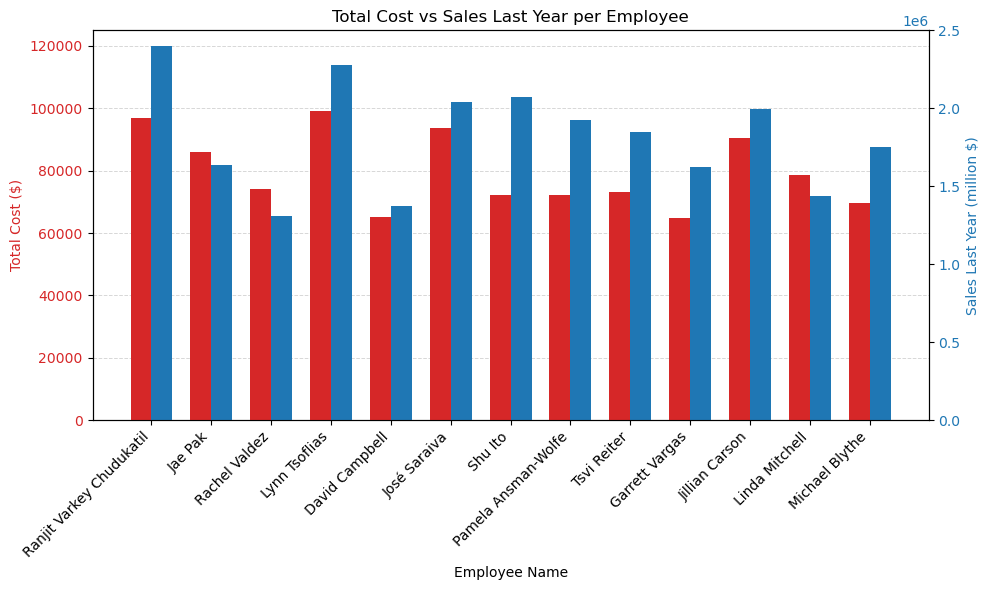

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy import text

query = """
SELECT 
    sa.EmployeeName, 
    sa.TotalCost,
    sa.SalesLastYear
FROM dbo.SalesAnalysis sa
WHERE sa.SalesLastYear > 0  -- Exclude employees with no sales last year
"""

fig, ax1 = plt.subplots(figsize=(10, 6))

bar_width = 0.35

index = range(len(df))

# added a zorder as the dashed lines were going over the red bar.
bar1 = ax1.bar(index, df['TotalCost'], bar_width, label='Total Cost', color='tab:red', zorder=3)

# Setting labels and colours (red for cost).
ax1.set_xlabel('Employee Name')
ax1.set_ylabel('Total Cost ($)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()

# Plotted sales last year (blue for profit)
bar2 = ax2.bar([i + bar_width for i in index], df['SalesLastYear'], bar_width, label='Sales Last Year', color='tab:blue')

# Labelled second y axis.
ax2.set_ylabel('Sales Last Year (million $)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(df['EmployeeName'], rotation=45, ha='right')

# In order to make the graph easily readable, I added a scale to each side manually. 
scaling_factor_totalcost = 125000 / df['TotalCost'].max()
scaling_factor_sales = 2500000 / df['SalesLastYear'].max()

ax1.set_ylim(0, df['TotalCost'].max() * scaling_factor_totalcost)
ax2.set_ylim(0, df['SalesLastYear'].max() * scaling_factor_sales)

# I wanted gridlines for the table to make it clear where each individual is roughly sitting.
ax1.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.5, zorder=0)

ax1.set_title('Total Cost vs Sales Last Year per Employee')
plt.tight_layout()

plt.show()

In [54]:
# I find this visualization interesting, as it indirectly gives some information about better and worse performers - 
# those with high sales-per-year relative to their cost in our graph have a higher blue bar than their red bar, whereas
# those with lower sales-per-year relative to their cost in our graph have a higher red bar than blue bar. 

# It is a bit of a mystery in the data, I could likely visualize this even better by breaking down the total cost bars into Bonus, Salary, 
# and commission within the same bar - maybe I'll try that as it may help explain the breakdown of cost a bit better by person. 



In [55]:
print(df.columns)

Index(['EmployeeName', 'TotalCost', 'SalesLastYear'], dtype='object')


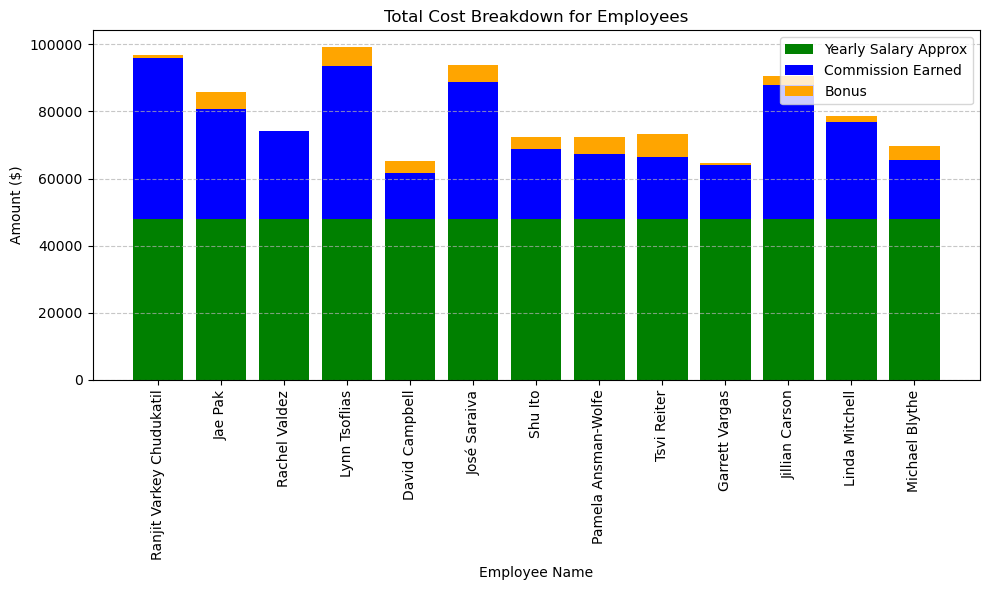

In [56]:
query = """
SELECT 
    sa.EmployeeName, 
    sa.TotalCost,
    sa.Bonus,
    sa.YearlySalaryApprox,
    sa.CommissionEarned
FROM dbo.SalesAnalysis sa
WHERE sa.SalesLastYear > 0  -- Exclude employees with no sales last year
"""

connection = engine.connect()

df_cost_breakdown = pd.read_sql(query, connection)

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting Yearly Salary Approx at the bottom of the stack
ax.bar(df_cost_breakdown['EmployeeName'], df_cost_breakdown['YearlySalaryApprox'], 
       label='Yearly Salary Approx', color='green')

# Plotting Commission Earned on top of Yearly Salary Approx
ax.bar(df_cost_breakdown['EmployeeName'], df_cost_breakdown['CommissionEarned'], 
       label='Commission Earned', color='blue', 
       bottom=df_cost_breakdown['YearlySalaryApprox'])

# Plotting Bonus on top of Yearly Salary Approx + Commission Earned
ax.bar(df_cost_breakdown['EmployeeName'], df_cost_breakdown['Bonus'], 
       label='Bonus', color='orange', 
       bottom=df_cost_breakdown['YearlySalaryApprox'] + df_cost_breakdown['CommissionEarned'])

ax.set_xlabel('Employee Name')
ax.set_ylabel('Amount ($)')
ax.set_title('Total Cost Breakdown for Employees')
ax.legend()

# Rotated employee names
plt.xticks(rotation=90)

# Added horizontal grid lines across the y-axis
ax.grid(True, axis='y', linestyle='--', alpha=0.7, zorder=0)

plt.tight_layout()

plt.show()

In [57]:
# Here we can visualize that there is a large variability in employee take-home based on commission. 
# Salary is consistent, and bonus is generally a very small fraction of the yearly take-home. I feel this helps visualize 
# how cost-efficiency may be evaluated. Interestingly, from this information, we can see that Jae Pak, for example,
# took home a generous amount of bonus but generated a relatively low amount of sales compared to his cost, suggesting he may
# have taken up some other role that is not directly sales motivated.

# It's time to do some confidence intervals! 

# As I have decided to do a cost-efficiency analysis of the Sales Representative employees at AdventureWorks, I plan on
# using SalesLastYear/TotalCost as a metric of CostEfficiency. 

In [58]:
import numpy as np
import pandas as pd
import scipy.stats as stats

query = """
SELECT 
    sa.TotalCost
    sa.SalesLastYear
FROM dbo.SalesAnalysis sa
"""

df['CostEfficiency'] = df['SalesLastYear'] / df['TotalCost']

mean_cost_efficiency = np.mean(df['CostEfficiency'])
std_cost_efficiency = np.std(df['CostEfficiency'], ddof=1)

n = len(df)

# 95% CI ratio with scipy.
confidence_level = 0.95
ci_lower, ci_upper = stats.t.interval(confidence_level, n - 1, loc=mean_cost_efficiency, scale=std_cost_efficiency / np.sqrt(n))

# Outputted results
print(f"Cost Efficiency Mean: {mean_cost_efficiency:.2f}")
print(f"Cost Efficiency Standard Deviation: {std_cost_efficiency:.2f}")
print(f"95% Confidence Interval for Cost Efficiency: ({ci_lower:.2f}, {ci_upper:.2f})")

Cost Efficiency Mean: 22.96
Cost Efficiency Standard Deviation: 3.37
95% Confidence Interval for Cost Efficiency: (20.92, 24.99)


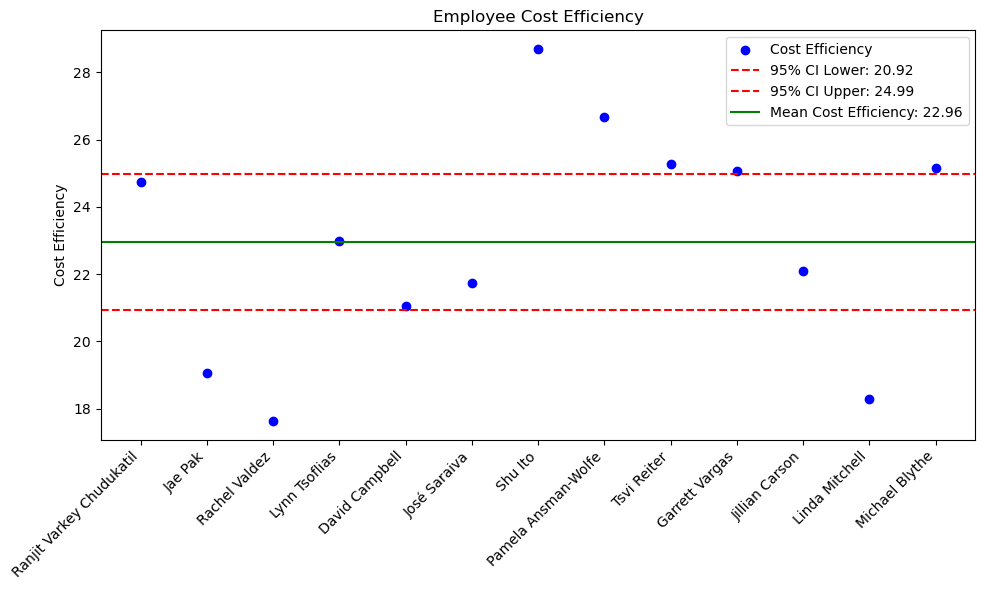

In [59]:
mean_ce = df['CostEfficiency'].mean()
std_error_ce = stats.sem(df['CostEfficiency']) 

confidence_interval = stats.t.interval(0.95, len(df)-1, loc=mean_ce, scale=std_error_ce)

plt.figure(figsize=(10, 6))

plt.scatter(df['EmployeeName'], df['CostEfficiency'], color='blue', label='Cost Efficiency')

plt.axhline(confidence_interval[0], color='red', linestyle='--', label=f'95% CI Lower: {confidence_interval[0]:.2f}')
plt.axhline(confidence_interval[1], color='red', linestyle='--', label=f'95% CI Upper: {confidence_interval[1]:.2f}')

plt.axhline(mean_ce, color='green', linestyle='-', label=f'Mean Cost Efficiency: {mean_ce:.2f}')

plt.ylabel('Cost Efficiency')
plt.xlabel('')
plt.title('Employee Cost Efficiency')

plt.xticks(rotation=45, ha='right')

plt.legend()

plt.tight_layout()

# Plotted CI's and employee's relative cost efficiency. 
plt.show()

In [60]:
## Here we have a graph that highlights the confidence intervals and the employee cost efficiency of each employee.
# I won't write too much here as I made a slightly improved one further down.

Outliers in Cost Efficiency: Empty DataFrame
Columns: [EmployeeName, TotalCost, SalesLastYear, CostEfficiency]
Index: []


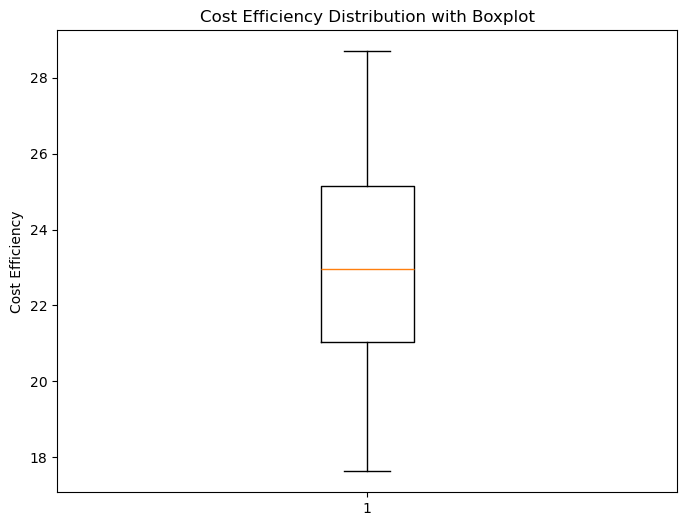

In [61]:
Q1 = df['CostEfficiency'].quantile(0.25)
Q3 = df['CostEfficiency'].quantile(0.75)
IQR = Q3 - Q1

# Defined the outliers as points that fall outside 1.5 * IQR range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['CostEfficiency'] < lower_bound) | (df['CostEfficiency'] > upper_bound)]

print(f"Outliers in Cost Efficiency: {outliers}")

plt.figure(figsize=(8, 6))
plt.boxplot(df['CostEfficiency'])
plt.title('Cost Efficiency Distribution with Boxplot')
plt.ylabel('Cost Efficiency')
plt.show()

In [62]:
# Here I was checking to see why so many results fell outside of confidence intervals - I had an idea, which is that we have
# a relatively small sample, which will generally mean that the confidence intervals should be quite wide, but also that 
# many more may fall outside of the confidence intervals simply due to a smaller sample size creating high variance. 

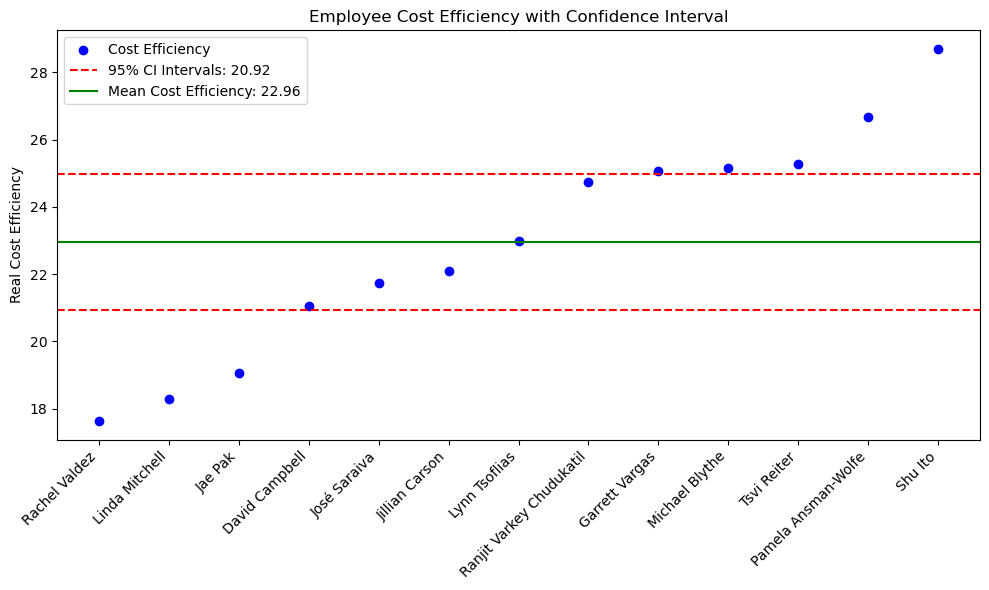

In [63]:

df['RealCostEfficiency'] = df['SalesLastYear'] / df['TotalCost']

df_sorted = df.sort_values(by='RealCostEfficiency', ascending=True)

mean_ce = df_sorted['RealCostEfficiency'].mean()
std_error_ce = stats.sem(df_sorted['RealCostEfficiency'])

confidence_interval = stats.t.interval(0.95, len(df_sorted)-1, loc=mean_ce, scale=std_error_ce)

plt.figure(figsize=(10, 6))

# Scatter plot with employees ordered by RealCostEfficiency
plt.scatter(df_sorted['EmployeeName'], df_sorted['RealCostEfficiency'], color='blue', label='Cost Efficiency')

plt.axhline(confidence_interval[0], color='red', linestyle='--', label=f'95% CI Intervals: {confidence_interval[0]:.2f}')
plt.axhline(confidence_interval[1], color='red', linestyle='--')
plt.axhline(mean_ce, color='green', linestyle='-', label=f'Mean Cost Efficiency: {mean_ce:.2f}')

plt.ylabel('Real Cost Efficiency')
plt.title('Employee Cost Efficiency with Confidence Interval')

# Rotated employee names for readability
plt.xticks(rotation=45, ha='right')

plt.legend()
plt.tight_layout()

plt.show()

In [64]:
## Q3 Data Analysis: What have we found? (The results - what are actionable take-aways from this?)##

## New graph with Cost Efficiency ranked from lowest to highest. If we were to compare this to the earlier graph that 
# plotted the cost vs sales we can see more clearly the contrast in cost efficiency between Rachel Valdez and Shu Ito. 

# The confidence interval here refers to the cost efficiency of the sample that we undertook our analysis on: the 14 
# salespeople within the company. This means that individuals who have a cost efficiency that falls significantly below or above
# these cost efficiencies are significantly deviating from the mean of the sample - they are effectively either heavily under-
# or over-performing. 

# Another way to confirm this could be to look at bonuses, as this would give hints about how the employees performed in the eyes
# of their superiors - they are perhaps taking on workloads that are not strictly based in sales and therefore hold greater merit
# to the company in other places. An example of this could be seen in Jae Pak - his cost efficiency fell below the lower 95% confidence
# interval, but still received a generous bonus, suggesting that his sales performance may not be the only factor to be taken into 
# account when deciding his overall performance. On the other hand, Rachel got almost no bonus, suggesting that her performance both
# financially and otherwise was perhaps lacking, and provides information for managers or higher ups on whether her performance should be
# reviewed. Shu performed exceptionally in sales, but his bonus was middling, this data suggests 
# that keeping him happy within the company through bonuses or commission bumps could be a wise investment. 

## Q2 The actual numbers ##

# Cost Efficiency Mean: 22.96
# Cost Efficiency Standard Deviation: 3.37
# 95% Confidence Interval for Cost Efficiency: (20.92, 24.99)

# Above are the means, SD and CI's for the sample, which were created slightly earlier in this report. 

# As well as these statistical measures that have been generated, we have also created some graphs to illustrate the information
# in such a way that I believe makes it quite understandable.

# Q1 Descriptive descriptions of the data 

# A comprehensive overview of the dataset was given throughout the first part of this analysis. I identified the important schemas
# that existed within the data, then explored a couple of these as examples, checking the tables that were contained within the schemas
# and inspecting the contents. Once I had a broad understanding of this information I gave only a quick descriptive overview of each schema
# and the tables that are contained within them.

## EXECUTIVE SUMMARY ##

# 1. The relationship between the cost of an employee and the value that they bring to the company is worth exploring. 
# 2. One form of value that an employee brings to a company is in the form of their yearly sales - a purely monetary value to the company
# which is unique to employees who are in a sales-person role. 
# 3. Both from a perspective of improving efficiency (employee (A) is able to sell (X) amount more than employee (B), why?), and when 
# evaluating individual performance for reviews it is valuable to be able to create figures that are comparative in nature. 
# 4. The metric that I have created is able to be used to compare sales-people based on their sales performances, identifying high and low
# performers. 
# 5. I found that there are three employees in the sales team who are significantly below the mean from a cost-efficiency perspective, and five that 
# are significantly higher than the mean.
# 6. This means that more time could be allocated to improving the poor performers in this metric, and it could be possible to utilize high
# performers to teach or otherwise be consulted on ways to improve this situation.
# 7. It should also be noted that this analysis is far from perfect; employees are never just the amount that they sell, there are administrative
# tasks and knowledge of systems that are invaluable and cannot be accounted for, but this is more of an early concept that can be improved upon
# where necessary. 
# 8. There will also be variability in things such as location, and clientel that could be a cause for this variability that is also unaccounted for.
# 9. Regardless of the gaps in this brief analysis, I believe that such a metric can be used when deciding bonuses for employees, as the
# data has shown that bonuses are not always necessarily given based on sales performance (see Lynn Tsoflias, who is dead centre for cost-efficiency
# but received the highest bonus for the year). 
# 10. Including some other merits in this analysis would create a more powerful metric; collecting data such as overtime, which I could not find,
# could be useful, as this would improve the accuracy of my hours worked variable that I created. 

# I will be presenting 03/01/2025.

# Questions from bottom of the sheet: 

# Challenges I had during the work: 
# Learning to wrap python scripts in SQLAlchemy within a Jupyter Notebook with a """ etc. was frustrating at first as I didn't
# really understand the process. I got used to it though, and worked through it. I'm still even now not 100% sure if I am writing everything
# in the way I should for the assignment, but I've managed to push through and create what I think are some nice graphs and analysis. Things 
# with numpy and matplotlib are exactly as we learned it however, so when we got to that point it was much more relaxing. 

# What grade? 
# G - I know I can do better than this, but with the Christmas and New Years period eating
# time up I wish I had a bit more time to clean it all up.

# Tips? 
# Start working with SQL earlier, familiarize myself with writing the code and exploring datasets - it's a work in progress but
# I still find myself frustrated sometimes wondering why something isn't loading as it should. 

